In [7]:
import pandas as pd
import numpy as np


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Carrera_911_1_2.csv',index_col=[0])

In [9]:
df

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
0,Used,47649,48950.0,2012,Porsche,911,Carrera,Black,Edition,Black,Automatic
1,Used,19020,67988.0,2015,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
3,Used,56436,51990.0,2012,Porsche,911,Carrera,S,Hardtop,Black,Automatic
4,Used,85000,34900.0,2009,Porsche,911,Carrera,S,Cabriolet,Black,Automatic
5,Used,15808,96995.0,2018,Porsche,911,Carrera,S,Hardtop,Black,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1493,Used,19826,99950.0,2017,Porsche,911,Carrera,4S,Hardtop,White,Manual
1494,Used,15710,89995.0,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
1495,Used,502,93900.0,2018,Porsche,911,Carrera,T,Hardtop,White,Manual
1496,Used,5182,81995.0,2016,Porsche,911,Carrera,S,Hardtop,White,Manual


In [10]:
df['Cabriolet'].value_counts()

Hardtop      736
Cabriolet     69
Edition        4
Black          1
Name: Cabriolet, dtype: int64

In [11]:
df.isnull().sum()

condition       0
milage          0
Price           0
Year            0
Brand           0
Model           0
Model_Vers      0
S_RS            0
Cabriolet       0
Color           0
Transmission    0
dtype: int64

In [12]:
df['Cabriolet'] = df['Cabriolet'].replace("Black",'Hardtop')

In [13]:
df['Cabriolet'] = df['Cabriolet'].replace("Edition",'Hardtop')

In [14]:
df['Price'] = df['Price'].astype(int)

In [15]:
df.dtypes

condition       object
milage           int64
Price            int32
Year             int64
Brand           object
Model            int64
Model_Vers      object
S_RS            object
Cabriolet       object
Color           object
Transmission    object
dtype: object

In [16]:
df.condition.value_counts(normalize=True)

Used                 0.84321
Porsche Certified    0.15679
Name: condition, dtype: float64

In [17]:
df['condition'] = df['condition'].replace("Porsche Certified",'CPO')

In [22]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df, test_size=0.20)

In [23]:
train

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
294,Used,21876,72495,2013,Porsche,911,Carrera,S,Hardtop,Black,Automatic
1391,Used,6242,106977,2018,Porsche,911,Carrera,T,Hardtop,Other,Manual
701,Used,28828,84995,2016,Porsche,911,Carrera,4S,Hardtop,Other,Automatic
99,Used,34281,85989,2017,Porsche,911,Carrera,S,Hardtop,Black,Automatic
891,Used,44999,83900,2017,Porsche,911,Carrera,S,Hardtop,White,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1115,Used,53969,32900,2007,Porsche,911,Carrera,Base,Cabriolet,Red,Automatic
638,Used,76275,26888,2007,Porsche,911,Carrera,Base,Cabriolet,Other,Automatic
1244,Used,20059,59995,2011,Porsche,911,Carrera,Base,Hardtop,Black,Manual
777,Used,23622,45999,2007,Porsche,911,Carrera,S,Cabriolet,Gray/Silver,Automatic


In [24]:
test

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
625,Used,56350,53890,2009,Porsche,911,Carrera,4S,Hardtop,Other,Automatic
192,CPO,7515,80900,2013,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
1162,Used,61784,36988,2008,Porsche,911,Carrera,S,Cabriolet,Red,Automatic
1068,Used,42752,58977,2012,Porsche,911,Carrera,S,Hardtop,Red,Automatic
1094,Used,20171,87795,2017,Porsche,911,Carrera,S,Hardtop,Red,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1001,CPO,17310,86998,2017,Porsche,911,Carrera,Base,Hardtop,White,Automatic
976,Used,26505,79900,2015,Porsche,911,Carrera,S,Hardtop,White,Automatic
129,CPO,2836,107498,2019,Porsche,911,Carrera,S,Hardtop,Black,Automatic
910,Used,37586,69786,2017,Porsche,911,Carrera,Base,Hardtop,White,Automatic


In [25]:
feature = ['condition','milage','Year','S_RS','Cabriolet']
target = 'Price'
X_train = train[feature]
X_test = test[feature]
Y_test = test[target]
Y_train = train[target]

In [707]:
#!pip install category_encoders

In [709]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)

In [711]:
X_test

,condition,milage,Year,S_RS,Cabriolet
830,Used,36843,2015,S,Hardtop
244,Used,22789,2017,4S,Hardtop
226,CPO,13220,2017,4S,Hardtop
1020,Used,21136,2013,S,Hardtop
606,Used,35103,2018,Base,Hardtop
...,...,...,...,...,...
1098,Used,5517,2019,T,Hardtop
1408,Used,17000,2008,S,Cabriolet
936,Used,26775,2013,S,Hardtop
1261,Used,22463,2013,Base,Hardtop


In [713]:
X_train

,condition_Used,condition_CPO,milage,Year,S_RS_4S,S_RS_S,S_RS_Base,S_RS_GTS,S_RS_4,S_RS_T,S_RS_GTS4,S_RS_Black,Cabriolet_Hardtop,Cabriolet_Cabriolet
1494,1,0,15710,2016,1,0,0,0,0,0,0,0,1,0
1176,1,0,35750,2008,0,1,0,0,0,0,0,0,0,1
692,1,0,26324,2010,1,0,0,0,0,0,0,0,0,1
758,1,0,130000,2013,0,0,1,0,0,0,0,0,1,0
825,1,0,4113,2017,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0,1,34541,2018,0,0,1,0,0,0,0,0,1,0
1151,0,1,17066,2015,0,0,0,1,0,0,0,0,1,0
938,1,0,40700,2017,0,0,1,0,0,0,0,0,1,0
1035,1,0,26067,2017,0,1,0,0,0,0,0,0,1,0


In [715]:
X_train = encoder.fit_transform(X_train)

KeyError: 'condition'

In [718]:
X_test = encoder.fit_transform(X_test)

KeyError: 'condition'

In [721]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [723]:
y_pred_train = model.predict(X_train)
print("MAE(Train):$",mean_absolute_error(Y_train, y_pred_train))

MAE(Train):$ 5883.753763007693


In [725]:
r2_base = r2_score(Y_train, y_pred_train)
print('R^2 scores (Train):',r2_base)

R^2 scores (Train): 0.8476625154832308


In [727]:
y_pred_val = model.predict(X_test)
print("MAE(Val):$",mean_absolute_error(Y_test, y_pred_val))

MAE(Val):$ 9125.103254784364


In [729]:
r2_base = r2_score(Y_test, y_pred_val)
print('R^2 scores (Val):',r2_base)

R^2 scores (Val): 0.5970105749780921


In [ ]:
model.coef_

In [732]:
list(X_train)

['condition_Used',
 'condition_CPO',
 'milage',
 'Year',
 'S_RS_4S',
 'S_RS_S',
 'S_RS_Base',
 'S_RS_GTS',
 'S_RS_4',
 'S_RS_T',
 'S_RS_GTS4',
 'S_RS_Black',
 'Cabriolet_Hardtop',
 'Cabriolet_Cabriolet']

In [734]:
condition_Used = 0
condition_CPO = 1
milage = 30000
Year = 2016
S_RS_4S = 0
S_RS_S = 0
S_RS_Base = 1
S_RS_GTS = 0
S_RS_4 = 0
S_RS_T = 0
S_RS_4GTS = 0
S_RS_Black_Ed = 0
Cabriolet_Hardtop = 0
Cabriolet_Cabriolet= 1
Color_White = 0
Color_Black = 1
Color_Other = 0
Color_Gray_Silver = 0
Color_Blue = 0
Color_Red = 0
Transmission_Manual = 0
Transmission_Automatic = 1

In [736]:
price = model.predict([[condition_Used,condition_CPO,milage,Year,S_RS_4S,S_RS_S
                ,S_RS_Base,S_RS_GTS,S_RS_4,S_RS_T,S_RS_4GTS,
                S_RS_Black_Ed,Cabriolet_Hardtop,Cabriolet_Cabriolet,Color_White,
                Color_Black,Color_Other,Color_Gray_Silver,Color_Blue,Color_Red,Transmission_Automatic,
                Transmission_Manual]])


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 22)

In [739]:
print("Your 911 should be price at :$",price)

Your 911 should be price at :$ [52387.30207463]


In [741]:
dt = df.copy()

### Linear Model (Ridge)
---

In [743]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    SelectKBest(f_regression), 
    Ridge()
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'selectkbest__k': range(1, len(X_train.columns)+1), 
    'ridge__alpha': [0.1, 1,8,9,10,15], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, Y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0273s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1616s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    1.1s
[Parallel(

In [745]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.4139482361541609, 'randomforestregressor__n_estimators': 283, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 28}
Cross-validation MAE 5526.853093469694


In [747]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

,96,9,53,88,43,27,55,45,3,57,...,48,41,14,6,33,78,35,30,4,52
mean_fit_time,1.03424,0.51657,1.17407,0.662985,0.47192,0.688582,0.456544,0.585926,1.30459,0.352415,...,1.35196,0.447915,0.814827,1.42954,1.17105,1.53866,0.537518,1.29313,0.769605,0.967512
std_fit_time,0.12277,0.0972069,0.175044,0.108295,0.0785934,0.106581,0.0714256,0.124574,0.236292,0.0435433,...,0.207736,0.0940734,0.179536,0.282906,0.172982,0.35165,0.0841804,0.158159,0.180968,0.14769
mean_score_time,0.0631326,0.0341484,0.0611296,0.0431465,0.0333879,0.038628,0.0411211,0.0369767,0.0706193,0.0323481,...,0.0845964,0.0353539,0.0576936,0.0696284,0.061336,0.0744137,0.0390566,0.0812346,0.0570652,0.0559829
std_score_time,0.0200459,0.00931386,0.0180627,0.0191111,0.00762359,0.00775029,0.0174151,0.00820512,0.0217184,0.0106295,...,0.0397351,0.0123887,0.0263924,0.0262808,0.0110627,0.0316954,0.0108541,0.0274399,0.0384708,0.0119313
param_randomforestregressor__max_depth,20,10,5,None,20,15,None,20,10,15,...,None,15,None,None,20,None,None,20,5,5
param_randomforestregressor__max_features,0.413948,0.900179,0.830259,0.430246,0.660827,0.857337,0.683378,0.659796,0.392505,0.547157,...,0.968966,0.904432,0.228901,0.510443,0.430096,0.412555,0.269507,0.293126,0.065312,0.0193041
param_randomforestregressor__n_estimators,283,80,376,137,90,135,70,122,367,60,...,347,81,162,375,312,392,100,384,178,274
param_simpleimputer__strategy,mean,median,mean,mean,mean,mean,mean,median,mean,median,...,median,mean,median,mean,mean,mean,mean,mean,median,mean
param_targetencoder__min_samples_leaf,28,120,1,159,95,95,51,73,178,51,...,444,289,464,300,308,296,304,396,390,406
params,"{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 10, 'rand...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 15, 'rand...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 10, 'rand...","{'randomforestregressor__max_depth': 15, 'rand...",...,"{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 15, 'rand...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': None, 'ra...","{'randomforestregressor__max_depth': 20, 'rand...","{'randomforestregressor__max_depth': 5, 'rando...","{'randomforestregressor__max_depth': 5, 'rando..."


In [749]:
pipeline = search.best_estimator_
from sklearn.metrics import mean_absolute_error
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

ValueError: Unexpected input dimension 14, expected 10

### Random Forrest Regressor
---

In [752]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1), 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed

In [754]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 0.8709830520332942, 'randomforestregressor__n_estimators': 407, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 16}
Cross-validation MAE 5204.381773013973


In [756]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__max_features,param_randomforestregressor__n_estimators,param_simpleimputer__strategy,param_targetencoder__min_samples_leaf,params,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
54,1.388140,0.134933,0.066917,0.018589,10,0.870983,407,mean,16,"{'randomforestregressor__max_depth': 10, 'rand...",...,-2382.767331,-2318.588609,-2288.833534,-2260.133918,-2165.038021,-2229.462982,-2053.470486,-2362.460898,-2271.360555,95.093656
94,1.203343,0.132186,0.066861,0.030051,20,0.324392,300,median,9,"{'randomforestregressor__max_depth': 20, 'rand...",...,-2027.064817,-1993.708771,-1955.407653,-1945.864955,-1931.707922,-1949.399010,-1848.498373,-2007.160152,-1969.964607,52.835542
41,0.397873,0.110932,0.039785,0.019306,10,0.684303,61,mean,44,"{'randomforestregressor__max_depth': 10, 'rand...",...,-2572.987875,-2637.405109,-2524.026560,-2528.615206,-2528.684870,-2537.648548,-2366.899246,-2596.773311,-2558.502142,80.562500
32,0.559510,0.111630,0.040763,0.010224,15,0.704568,95,mean,113,"{'randomforestregressor__max_depth': 15, 'rand...",...,-2192.245055,-2159.057200,-2144.727343,-2089.969556,-2106.478055,-2132.562026,-1951.177518,-2130.447650,-2127.388602,66.900855
20,0.849356,0.196298,0.046898,0.012408,15,0.628332,163,median,160,"{'randomforestregressor__max_depth': 15, 'rand...",...,-2176.750514,-2150.786696,-2150.739821,-2063.658035,-2073.326664,-2145.550231,-1952.353459,-2137.768502,-2124.396044,71.905154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,1.111239,0.185360,0.065856,0.021599,None,0.0169354,285,mean,404,"{'randomforestregressor__max_depth': None, 'ra...",...,-3148.130601,-3017.446071,-3119.692426,-3006.301953,-2966.937089,-2980.495188,-2838.497597,-3092.769118,-3041.245749,97.226053
68,1.225865,0.109033,0.064428,0.012192,20,0.0164147,363,mean,384,"{'randomforestregressor__max_depth': 20, 'rand...",...,-3148.718753,-3016.857046,-3119.488331,-3005.530119,-2965.237276,-2978.643629,-2836.974295,-3092.549057,-3040.157627,96.597532
62,0.395503,0.073098,0.030818,0.010449,15,0.168431,70,median,351,"{'randomforestregressor__max_depth': 15, 'rand...",...,-3247.143300,-3114.405928,-3210.187952,-3098.356375,-3015.271924,-3073.864326,-2927.726333,-3139.905928,-3124.791723,99.478119
9,1.505233,0.267249,0.076069,0.014534,20,0.0156738,436,median,359,"{'randomforestregressor__max_depth': 20, 'rand...",...,-3150.483189,-3012.178099,-3121.486042,-2999.726742,-2965.689484,-2981.674644,-2839.776595,-3094.503226,-3038.198385,94.428697


In [758]:
pipeline = search.best_estimator_

In [760]:
X_test = test[features]
y_test = test[target]

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $5,695


In [762]:
X_test

,condition,milage,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
830,Used,36843,2015,Porsche,911,Carrera,S,Hardtop,White,Automatic
244,Used,22789,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
226,CPO,13220,2017,Porsche,911,Carrera,4S,Hardtop,Black,Automatic
1020,Used,21136,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
606,Used,35103,2018,Porsche,911,Carrera,Base,Hardtop,Other,Automatic
...,...,...,...,...,...,...,...,...,...,...
1098,Used,5517,2019,Porsche,911,Carrera,T,Hardtop,Red,Automatic
1408,Used,17000,2008,Porsche,911,Carrera,S,Cabriolet,Other,Manual
936,Used,26775,2013,Porsche,911,Carrera,S,Hardtop,White,Automatic
1261,Used,22463,2013,Porsche,911,Carrera,Base,Hardtop,Gray/Silver,Manual


In [764]:
Model_test = X_test.loc[1,].copy()
Model_test

condition            Used
milage              19020
Year                 2015
Brand             Porsche
Model                 911
Model_Vers        Carrera
S_RS                 Base
Cabriolet         Hardtop
Color               Black
Transmission    Automatic
Name: 1, dtype: object

In [766]:
Model_test.condition = 'Used'
Model_test.milage = 60000
Model_test.Year = 2012
Model_test.Brand = 'Porsche'
Model_test.Model = 911
Model_test.Model_Vers = 'Carrera'
Model_test.S_RS = 'S'
Model_test.Cabriolet = 'Cabriolet'
Model_test.Color = 'Black'
Model_test.Transmission = 'Automatic'

In [768]:
Model_test

condition            Used
milage              60000
Year                 2012
Brand             Porsche
Model                 911
Model_Vers        Carrera
S_RS                    S
Cabriolet       Cabriolet
Color               Black
Transmission    Automatic
Name: 1, dtype: object

In [770]:
Model_test.to_csv('Test_Car.csv')

In [772]:
price = pipeline.predict([Model_test])


In [774]:
print("High price for your 911 is:$",round(price[0]+(price[0]*.05),0))
print("Fair price for your 911 is:$",round(price[0],0))
print("Low price for your 911 is:$",round(price[0]-(price[0]*.05),0))

High price for your 911 is:$ 54317.0
Fair price for your 911 is:$ 51731.0
Low price for your 911 is:$ 49144.0


In [776]:
train.Color.value_counts()

Black          218
White          117
Gray/Silver    101
Other           93
Blue            64
Red             55
Name: Color, dtype: int64

In [778]:
import joblib
joblib.dump(pipeline, '911_Price.pkl') 

['911_Price.pkl']

In [780]:
df.S_RS.value_counts()

S        286
Base     263
4S       148
GTS       47
4         29
GTS4      18
T         15
Black      4
Name: S_RS, dtype: int64

In [782]:
test_model_data = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Test_Car.csv',index_col=[0])

In [784]:
model = joblib.load('911_Price.sav')

In [786]:
model.predict([Model_test])

array([52387.30207463])

In [788]:
test_model_data = pd.read_csv('https://raw.githubusercontent.com/popkdodge/Unit-2-Build/master/Test_Car.csv',index_col=[0])

In [790]:
test_model_data.T

,condition,milage,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
1,Used,60000,2012,Porsche,911,Carrera,S,Cabriolet,Black,Automatic


In [792]:
df

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
0,Used,47649,48950,2012,Porsche,911,Carrera,Black,Hardtop,Black,Automatic
1,Used,19020,67988,2015,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
3,Used,56436,51990,2012,Porsche,911,Carrera,S,Hardtop,Black,Automatic
4,Used,85000,34900,2009,Porsche,911,Carrera,S,Cabriolet,Black,Automatic
5,Used,15808,96995,2018,Porsche,911,Carrera,S,Hardtop,Black,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1493,Used,19826,99950,2017,Porsche,911,Carrera,4S,Hardtop,White,Manual
1494,Used,15710,89995,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
1495,Used,502,93900,2018,Porsche,911,Carrera,T,Hardtop,White,Manual
1496,Used,5182,81995,2016,Porsche,911,Carrera,S,Hardtop,White,Manual


In [794]:
std = df.Price[df.Year==2012].std()

In [796]:
spot = (mean-price[0])/std

In [798]:
spot

1.9100487226173557

In [800]:
year_for_chart = 2015

In [802]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

np.random.seed(1)
mean = df.Price[df.Year==year_for_chart].mean()
std = df.Price[df.Year==year_for_chart].std()
x = np.random.randn(10000)
spot = (mean)/std
hist_data = [x]
price = model.predict([Model_test])
fair = round(price[0],0)
group_labels = ['911 Carrera'] # name of the dataset
number = year_for_chart
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(
    title={
        'text': f"{number} Carrera Price Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f")
    )
fig.add_trace(go.Scatter(
    x=[0,2.13,-2.11],
    y=[0.45,0.3,0.3],
    text=[f"Mean:{mean:,.0f}",f'1 STD:{(mean+std):,.0f}',f'-1 STD:{mean-std:,.0f}'],
    mode="text",
)) 

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=0,
            y0=0,
            x1=0,
            y1=0.4,
            line=dict(
                color="Yellow",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=1,
            y0=0,
            x1=1,
            y1=0.23,
            line=dict(
                color="Red",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=-1,
            y0=0,
            x1=-1,
            y1=0.23,
            line=dict(
                color="red",
                width=3
            )))
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=spot,
            y0=0,
            x1=spot,
            y1=0.4,
            line=dict(
                color="Green",
                width=3
            )))
fig.show()

In [804]:
Model_test = Model_test.T

In [806]:
from ipywidgets import IntSlider
from IPython.display import display
x = IntSlider(description='x')
y = IntSlider(description='y')

def update_y(args):
    y.value = args['new']
    print(args['new'])

x.observe(update_y, 'value')

display(x)
display(y)

IntSlider(value=0, description='x')

IntSlider(value=0, description='y')

In [808]:
price[0]-mean

-19853.243379914442

In [810]:
spot = (mean-price[0])/std
spot_std = (price[0]-mean)
spot_std

-19853.243379914442

In [812]:
print("High price for your 911 is:$",round(price[0]+(price[0]*.05),0))
print("Fair price for your 911 is:$",round(price[0],0))
print("Low price for your 911 is:$",round(price[0]-(price[0]*.05),0))

High price for your 911 is:$ 55007.0
Fair price for your 911 is:$ 52387.0
Low price for your 911 is:$ 49768.0


In [814]:
import plotly.graph_objects as go

fig1 = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = spot_std,
    mode = "gauge+number+delta",
    title = {'text': "Price"},
    delta = {'reference': 0},
    gauge = {'axis': {'range': [-10000, 10000]},
            'bar': {'color': "#402306"},
             'steps' : [
                 {'range': [-10000, -3333], 'color': "#C29049"},
                 {'range': [-3333, 3333], 'color': "#464C47"},
                 {'range': [3333, 10000], 'color': "#A43131"}],
             'threshold' : {'line': {'color': "Black", 'width': 4}, 'thickness': 0.75, 'value': 1}}))

fig1.show()

In [816]:
Model_test

condition            Used
milage              60000
Year                 2012
Brand             Porsche
Model                 911
Model_Vers        Carrera
S_RS                    S
Cabriolet       Cabriolet
Color               Black
Transmission    Automatic
Name: 1, dtype: object

In [818]:
import plotly.express as px

fig3 = px.scatter(df, x="Year", y="Price", color="Transmission", trendline="lowess")
fig3.update_layout(
    title="The 991.1 and 991.2",
    xaxis_title="Model Year",
    yaxis_title="Price",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"),
    xaxis=dict(
        range=[2011.5, 2019.5]),
    yaxis=dict(
        range=[30000, 150000]),
        )
fig3.add_trace(go.Scatter(
    x=[year_for_chart],
    y=[price[0]],
    mode="markers",
)) 
fig.add_annotation(
        x=year_for_chart,
        y=price[0],
        xref="x",
        yref="y",
        text="max=5",
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8
        )  
fig3.show()

In [820]:
df.Year[df.Year==2012]

0       2012
3       2012
11      2012
12      2012
32      2012
        ... 
1465    2012
1466    2012
1468    2012
1486    2012
1491    2012
Name: Year, Length: 70, dtype: int64

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    GradientBoostingRegressor(random_state=42)
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'gradientboostingregressor__max_depth': [5, 10, 15, 20, None], 
    'gradientboostingregressor__loss': ['ls','lad','huber','quantile'], 
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, y_train);

NameError: name 'make_pipeline' is not defined

In [824]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'gradientboostingregressor__loss': 'lad', 'gradientboostingregressor__max_depth': None, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 4}
Cross-validation MAE 5185.666506068113


In [ ]:
pipeline = search.best_estimator_

In [827]:

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

ValueError: Unexpected input dimension 5, expected 10

In [872]:
Y_train

1494     89995
1176     39300
692      59000
758      34900
825     103995
         ...  
1047     84995
1151     89957
938      66999
1035     94951
324      76500
Name: Price, Length: 648, dtype: int32

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
feature = ['condition','milage','Year','S_RS','Cabriolet']
target = 'Price'
X_train = train[feature]
X_test = test[feature]
Y_test = test[target]
Y_train = train[target]
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    XGBRegressor(random_state=42,n_jobs=-1)
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'],
    'xgbregressor__learning_rate': [.03, 0.05, .07 ,0.13,0.2],
    'xgbregressor__max_depth': [5, 6, 7],}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed

In [32]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 8, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 7}
Cross-validation MAE 5052.528936767578


In [34]:
pipeline = search.best_estimator_
from sklearn.metrics import mean_absolute_error
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $5,061


In [836]:
from sklearn import svm
dir(svm.SVR)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_more_tags',
 '_pairwise',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'coef_',
 'fit',
 'get_params',
 'n_support_',
 'predict',
 'score',
 'set_params']

In [838]:
from sklearn.svm import LinearSVR

pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(), 
    LinearSVR()
)
param_distributions = {
    'targetencoder__min_samples_leaf': randint(1, 1000),     
    'simpleimputer__strategy': ['mean', 'median'],}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=10, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)
search.fit(X_train, y_train);

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1017s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 290

In [840]:
df.columns

Index(['condition', 'milage', 'Price', 'Year', 'Brand', 'Model', 'Model_Vers',
       'S_RS', 'Cabriolet', 'Color', 'Transmission'],
      dtype='object')

In [ ]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(x=df.Year, y=df.Price)
fig.show()

In [843]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 648}
Cross-validation MAE 71975.39240384617


In [845]:
pd.DataFrame(y_pred)

,0
0,66894.304688
1,92894.437500
2,97573.492188
3,63947.000000
4,72434.000000
...,...
157,94768.195312
158,58654.175781
159,62244.480469
160,61815.140625


In [847]:
y_pred

array([ 66894.305,  92894.44 ,  97573.49 ,  63947.   ,  72434.   ,
        61639.652,  56716.184,  81317.914,  65744.336,  85415.72 ,
       100962.04 , 175901.6  ,  73890.31 ,  59896.355, 100984.984,
        72483.35 ,  98473.14 ,  31540.758, 116718.24 ,  48718.637,
        94683.28 ,  56651.24 ,  73893.68 ,  96866.85 ,  75903.62 ,
        78212.85 ,  69790.64 ,  49498.297,  40617.914,  73664.51 ,
        69921.06 ,  91540.6  ,  92333.23 ,  33698.566,  81395.414,
        80487.33 ,  80157.36 ,  68284.19 ,  71803.414,  58144.902,
        66328.47 ,  88172.43 ,  81342.02 ,  71362.3  ,  65865.24 ,
        57405.914,  78174.83 , 111836.62 ,  56707.047,  57344.547,
        55621.066,  56554.35 ,  52912.49 ,  41479.523,  87830.25 ,
        61718.676,  76324.02 ,  83495.75 ,  65665.31 ,  69252.6  ,
        57022.3  ,  62856.52 ,  84451.55 ,  49215.203,  97844.77 ,
        52044.758, 125525.65 ,  67215.31 ,  46300.242,  32986.906,
        56201.504,  72175.49 ,  51218.926,  50015.91 ,  68831.

In [51]:
p_importance = pd.DataFrame({'feature' : X_test.columns,
                             'weight'  : pi.importances_mean,
                             'std'     : pi.importances_std})

p_importance.sort_values('weight', ascending=False).tail(10)

NameError: name 'pi' is not defined

In [852]:
df

,condition,milage,Price,Year,Brand,Model,Model_Vers,S_RS,Cabriolet,Color,Transmission
0,Used,47649,48950,2012,Porsche,911,Carrera,Black,Hardtop,Black,Automatic
1,Used,19020,67988,2015,Porsche,911,Carrera,Base,Hardtop,Black,Automatic
3,Used,56436,51990,2012,Porsche,911,Carrera,S,Hardtop,Black,Automatic
4,Used,85000,34900,2009,Porsche,911,Carrera,S,Cabriolet,Black,Automatic
5,Used,15808,96995,2018,Porsche,911,Carrera,S,Hardtop,Black,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
1493,Used,19826,99950,2017,Porsche,911,Carrera,4S,Hardtop,White,Manual
1494,Used,15710,89995,2016,Porsche,911,Carrera,4S,Hardtop,White,Manual
1495,Used,502,93900,2018,Porsche,911,Carrera,T,Hardtop,White,Manual
1496,Used,5182,81995,2016,Porsche,911,Carrera,S,Hardtop,White,Manual


In [854]:

guess = round(df.Price[df.Year==i].mean())
for i in range (2012, 2020):
    guess = round(df.Price[df.Year==i].mean())
    errors = guess - df['Price']
    m = round(df.Price[df.Year==i].mean())
    #print(i,'average price is ${}.'.format(m))
    mean_absolute_error = round(errors.abs().mean(),0)
    print('Mean absolute error for year {} is ${}.'.format(i,mean_absolute_error))

Mean absolute error for year 2012 is $19947.0.
Mean absolute error for year 2013 is $20225.0.
Mean absolute error for year 2014 is $18744.0.
Mean absolute error for year 2015 is $18632.0.
Mean absolute error for year 2016 is $22666.0.
Mean absolute error for year 2017 is $23336.0.
Mean absolute error for year 2018 is $28290.0.
Mean absolute error for year 2019 is $40999.0.


In [856]:
df.Price[df.Year == 2012].mean()

61906.65714285714

In [ ]:
X_test

In [38]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
gb = make_pipeline(
    ce.OrdinalEncoder(), 
    LinearSVR()
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(Y_test, y_pred))

NameError: name 'LinearSVR' is not defined

In [40]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
feature = 'Year'

isolated = pdp_isolate(
    model= pipeline,
    dataset=X_test,
    model_features=X_test.columns,
    feature=feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x199a6a84f88>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x199a6e65208>})

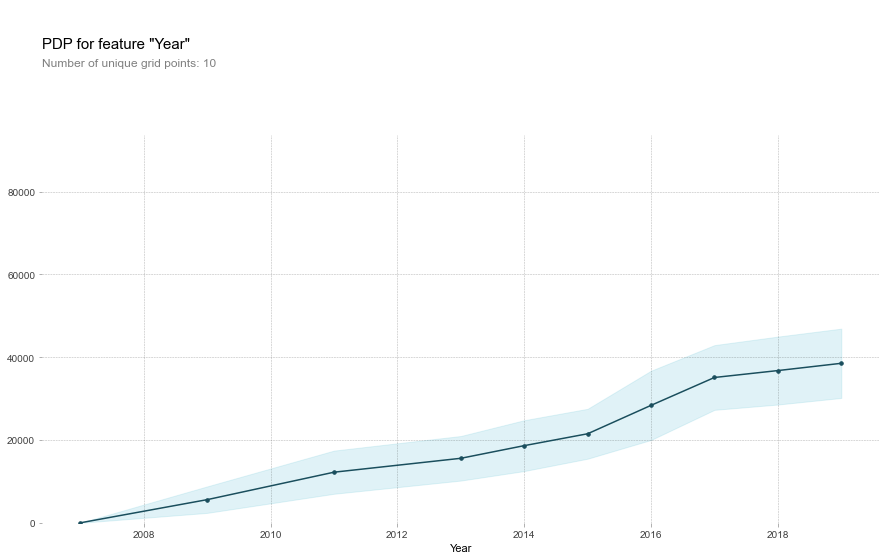

In [41]:
pdp_plot(isolated, feature_name=feature)

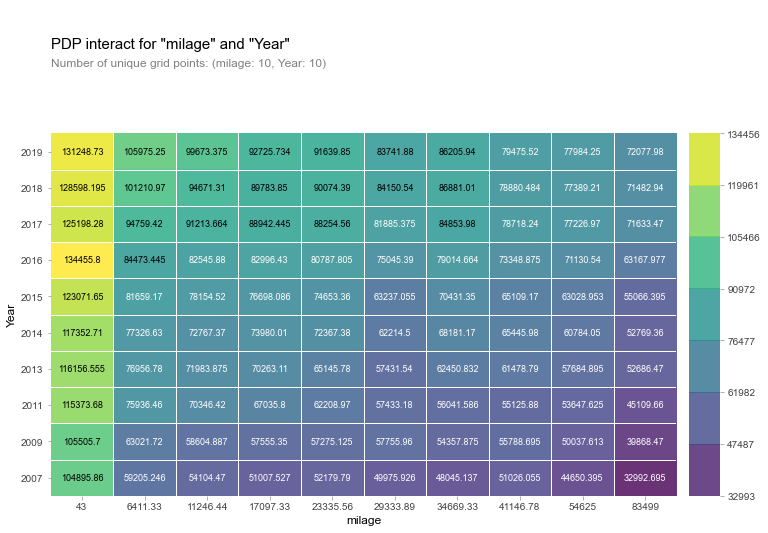

In [50]:
features = ['milage', 'Year']

interaction = pdp_interact(
    model=pipeline, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features, ncols= "interger", figsize= [12, 9]);

In [864]:
dict(pdp_interact)

TypeError: 'function' object is not iterable

In [ ]:
import shap

row
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)